## 1. 1D kernel density estimator

The COVIDincubation.txt file is a
comma-delimited data file that includes 59 observations on individuals in China
who tested positive for the COVID-19 virus. The data contain the following
three variables: gender ("M" or "F"), age (integers between 10 and 70), and
symp days (days until symptomatic, 
oat). This is a subset of the variables in
the dataset used by Men et al. (2020). The symp days variable represents the
incubation period for each individual, or the number of days until symptoms
were manifest.

(a) Create three histograms, each of symp days (Incubation period, days to
symptomatic). The first one is the overall histogram. Let each histgram
have 15 bins over the range of days from 2 to 15 (the maximum in the
data). In the matplotlib.pyplot.hist() call, set the histogram to density density=True. Let the first histogram be for all the data. Let the
second histogram be for individuals of age<= 40, and let the third histogram
be for individuals age> 40.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("COVIDincubation.txt")
df.head()

,gender,age,symp_days
0,F,52.0,5.0
1,M,42.0,6.5
2,F,32.0,3.0
3,M,22.0,4.0
4,M,41.0,8.0


Text(0, 0.5, 'Frequency for each observation in bin')

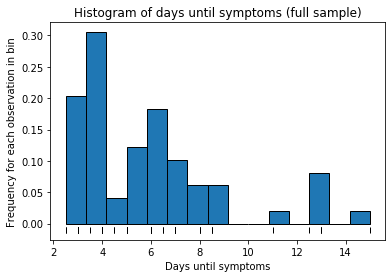

In [2]:
symp_days_t = df['symp_days'].values
symp_days_old = df['symp_days'][df['age'] > 40].values
symp_days_young = df['symp_days'][df['age'] < 40].values
num_bins = 15
N_t = len(symp_days_t)
N_old = len(symp_days_old)
N_young = len(symp_days_young)

n_t, bin_cuts_t, patches_t = plt.hist(symp_days_t, num_bins, 
                                      density=True, edgecolor='black')
plt.plot(symp_days_t, np.full_like(symp_days_t, -0.01), '|k',
        markeredgewidth=1)
plt.title('Histogram of days until symptoms (full sample)')
plt.xlabel('Days until symptoms')
plt.ylabel('Frequency for each observation in bin')


Text(0, 0.5, 'Frequency for each observation in bin')

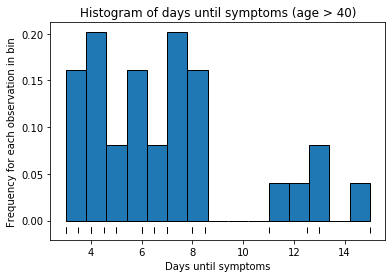

In [3]:
n_old, bin_cuts_old, patches_old = plt.hist(symp_days_old, num_bins, 
                                      density=True, edgecolor='black')
plt.plot(symp_days_old, np.full_like(symp_days_old, -0.01), '|k',
        markeredgewidth=1)
plt.title('Histogram of days until symptoms (age > 40)')
plt.xlabel('Days until symptoms')
plt.ylabel('Frequency for each observation in bin')

Text(0, 0.5, 'Frequency for each observation in bin')

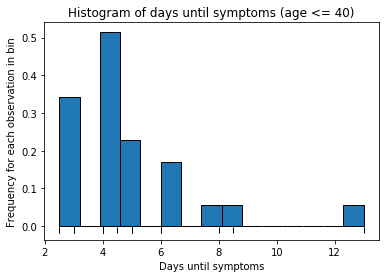

In [4]:
n_young, bin_cuts_young, patches_young = plt.hist(symp_days_young, num_bins, 
                                      density=True, edgecolor='black')
plt.plot(symp_days_young, np.full_like(symp_days_young, -0.01), '|k',
        markeredgewidth=1)
plt.title('Histogram of days until symptoms (age <= 40)')
plt.xlabel('Days until symptoms')
plt.ylabel('Frequency for each observation in bin')

(b) Fit a Gaussian KDE as an approximation ot the incubation period for
each of the three subsets of data from part (a). Use the GridSearchCV and
LeaveOneOut methods as in the VanderPlas notebook to choose an optimal
bandwith, and report your optimal bandwidths for the three KDEs. For
your grid search, use 500 exponentially spaced bandwidths between 0.1
and 10 using the code: bandwidths = 10 ** np.linspace(-1, 1, 500).
Plot each of the KDE distributions in one plot with a legend that shows
which is which. This figure should look like the right panel of Figure 2 in
Men et al. (2020).

In [5]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV, LeaveOneOut

# Find optimal bandwidth for total sample KDE
bandwidths = 10 ** np.linspace(-1, 1, 500)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())

# Find optimal bandwidth for total sample KDE
grid.fit(symp_days_t[:, None])
bandwidth_t = grid.best_params_['bandwidth']
print('Total Sample Optimal Bandwidth =', bandwidth_t)

# Find optimal bandwidth for old people KDE
grid.fit(symp_days_old[:, None])
bandwidth_old = grid.best_params_['bandwidth']
print('Individuals of age over 40 Optimal Bandwidth =', bandwidth_old)

# Find optimal bandwidth for young people KDE
grid.fit(symp_days_young[:, None])
bandwidth_young = grid.best_params_['bandwidth']
print('Individuals of age under or equal to 40 Optimal Bandwidth =', bandwidth_young)

Total Sample Optimal Bandwidth = 0.8910453324821516
Individuals of age over 40 Optimal Bandwidth = 1.1861737164524786
Individuals of age under or equal to 40 Optimal Bandwidth = 1.6536244070941806


In [6]:
#Fit a Gaussian KDE for the all individuals
kde_t = KernelDensity(bandwidth=bandwidth_t, kernel='gaussian')
kde_t.fit(symp_days_t.reshape(N_t, 1))
x_pts = np.linspace(0.01, 21, 1000).reshape((1000,1))
logprob_t = kde_t.score_samples(x_pts).reshape((1000,1))

#Fit a Gaussian KDE for the people over 40
kde_old = KernelDensity(bandwidth=bandwidth_old, kernel='gaussian')
kde_old.fit(symp_days_old.reshape(N_old, 1))
logprob_old = kde_old.score_samples(x_pts).reshape((1000,1))

#Fit a Gaussian KDE for the people under or equal to 40
kde_young = KernelDensity(bandwidth=bandwidth_young, kernel='gaussian')
kde_young.fit(symp_days_young.reshape(N_young, 1))
logprob_young = kde_young.score_samples(x_pts).reshape((1000,1))

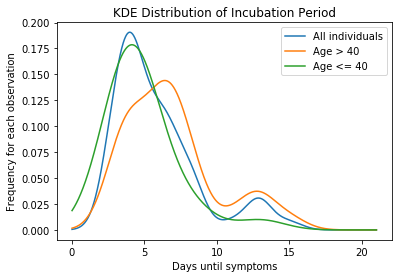

In [7]:
plt.plot(x_pts, np.exp(logprob_t), label='All individuals')
plt.plot(x_pts, np.exp(logprob_old), label='Age > 40')
plt.plot(x_pts, np.exp(logprob_young), label='Age <= 40')
plt.title('KDE Distribution of Incubation Period')
plt.xlabel('Days until symptoms')
plt.ylabel('Frequency for each observation')
plt.legend()

(c) What does this tell you about COVID-19 incubation periods of young
versus old individuals?

As we can see from above graphs, most of people would manifest their symptoms in less than 10 days, especially young people (age less or equal to 40). The frequency of observed symptoms for old people (age over 40) after 10 days is higher than that for young people. There are still a few old people show symptoms after 10 days. Old people tend to have longer incubation periods on average than the young. The peak of incubation period for younger people is about 4 days, while the peak for older people is about 7 days. In addition, if a person is not getting any symptom after 10 days of quarantine, the probability of actually having COVID-19 is going down and down.

## 2. 2D kernel density estimator

(a) Read in the BQ probmat.txt data as a 73 x 7 NumPy array. Plot the
2D empirical histogram of these data as a 3D surface plot with age and
income group on the x-axis and y-axis and the histogram density on the
z-axis using a 3D surface plot tool (not a 3D bar histogram tool). Make
sure that the axes are labeled correctly. And make sure that your 3D
histogram is presented from a perspective that allows a viewer to see that
data (don't let the data be hidden by a poor angle of the plot.)

<IPython.core.display.Javascript object>


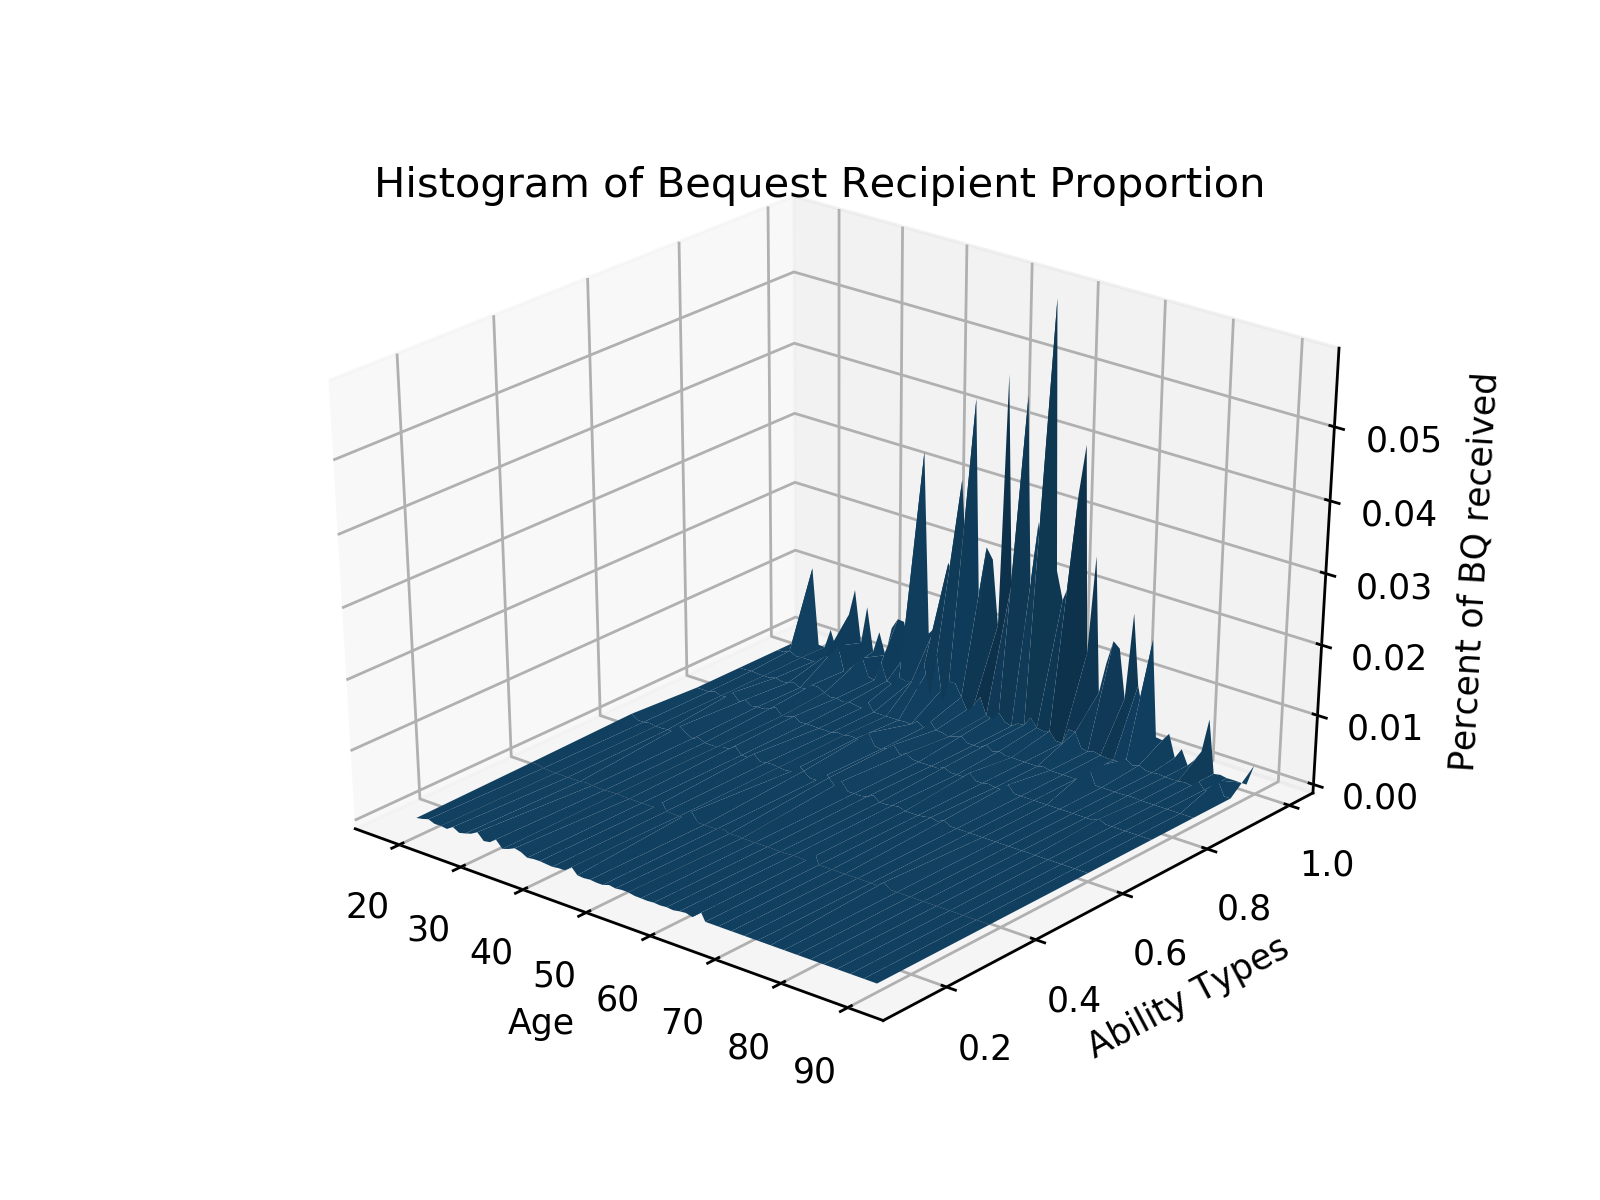

Text(0.5, 0, 'Percent of BQ received')

In [8]:
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

bq_data = np.loadtxt('BQ_probmat.txt', delimiter=',')
age_vec = np.arange(18, 91)
lambdas = np.array([0.25, 0.25, 0.20, 0.10, 0.10, 0.09, 0.01])
lambdas_mid = np.array([0.125, 0.375, 0.60, 0.75, 0.85, 0.94, 0.995])
income_mat, age_mat = np.meshgrid(lambdas_mid, age_vec)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(age_mat, income_mat, bq_data)
ax.set_title('Histogram of Bequest Recipient Proportion')
ax.set_xlabel('Age')
ax.set_ylabel('Ability Types')
ax.set_zlabel('Percent of BQ received')

(b) Use the BQ ind data.txt data to fit a bivariate Gaussian kernel density estimator to the data using the scipy.stats.gaussian kde method.
Choose a bandwidth parameter that you think is best. Justify your
choice of that parameter. Your justification should have to do with the
tradeoff between overfitting (too low a value) and underfitting (too high
a value). Plot the surface of your chosen kernel density estimator. Make
sure that the axes are labeled correctly. And make sure that your 3D histogram is presented from a perspective that allows a viewer to see that
data. What is the estimated density for bequest recipients who are age 61
in the 6th lifetime income category (j = 6, 90th to 99th percentile).

In [9]:
bq_ind_df = pd.read_csv('BQ_ind_data.txt', delimiter=',')
bq_ind_df

,age,income_pctl
0,18,0.125
1,18,0.125
2,18,0.125
3,18,0.125
4,18,0.125
...,...,...
69995,90,0.995
69996,90,0.995
69997,90,0.995
69998,90,0.995


<IPython.core.display.Javascript object>


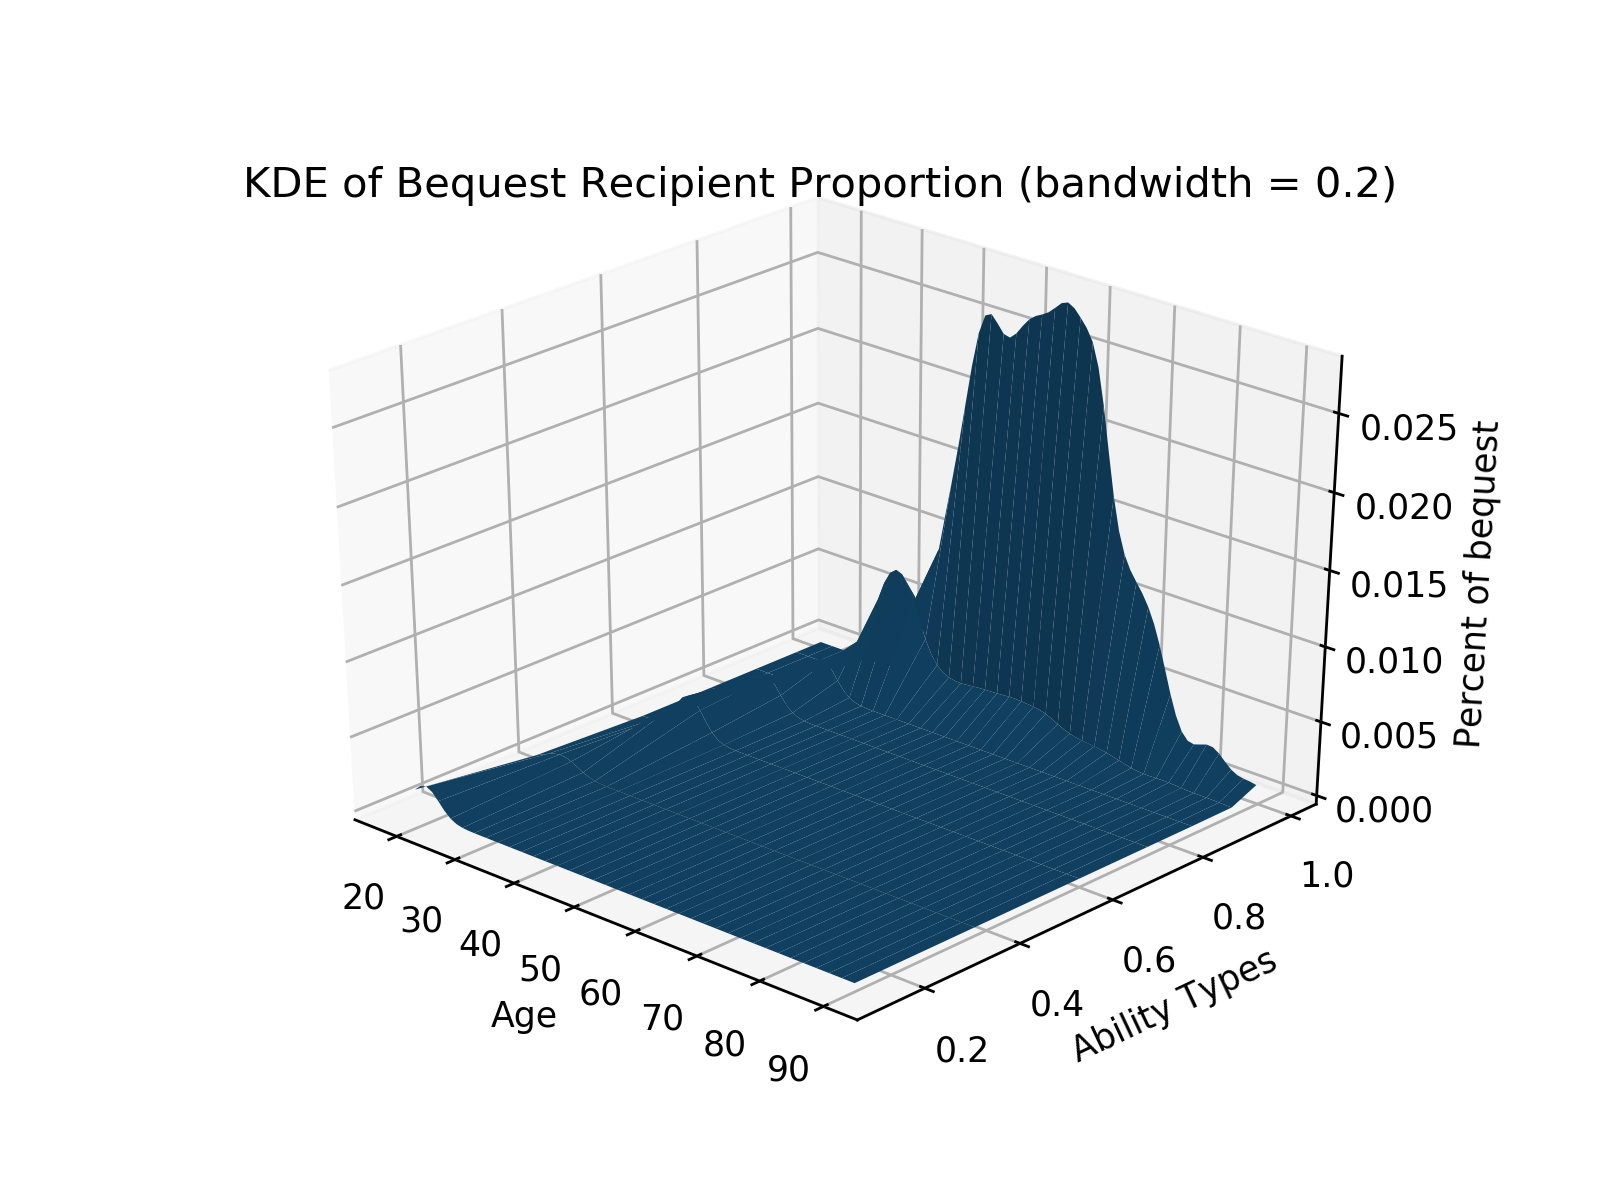

Text(0.5, 0, 'Percent of bequest')

In [11]:
bandwidth = 0.2
kde_density = gaussian_kde(bq_ind_df.T, bw_method=bandwidth)

# create a matrix of probabilities that looks like bq_data
# and the sum of all the entries adds to 1
coords = np.vstack([item.ravel() for item in [age_mat, income_mat]])
Z = np.reshape(kde_density(coords), age_mat.shape)
Z_scaled = Z / float(np.sum(Z))

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(age_mat, income_mat, Z_scaled)
ax.set_title('KDE of Bequest Recipient Proportion (bandwidth = 0.2)')
ax.set_xlabel('Age')
ax.set_ylabel('Ability Types')
ax.set_zlabel('Percent of bequest')

I tried different bandwidth and found that 0.2 gives a relatively smoothing figure without overfitting or underfitting the data.

In [12]:
print("The estimated density for bequest recipients who are age 61 in the "
      "6th lifetime income category is", 
       Z_scaled[61-18+1, 5])

The estimated density for bequest recipients who are age 61 in the 6th lifetime income category is 0.0014615780069221782
